In [ ]:
# Displaying 2011 census languages data for the new 2022 wards.

In [1]:
# Dependencies
!pip install geopandas mapclassify

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 43.5 MB/s 
     |████████████████████████████████| 15.4 MB 36.5 MB/s 


In [2]:
import os

import geopandas as gpd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from google.colab import drive

Data
==


GDrive mount
--

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
project_dir = '/content/gdrive/MyDrive/WardProfiles'
oa_dir = f"{project_dir}/boundaries/oa"
ward_dir = f"{project_dir}/boundaries/2022_wards"
languages_dir = f"{project_dir}/languages"

# Outputs
out_dir = f"{project_dir}/languages/maps"

In [ ]:
!mkdir -p "{out_dir}"

In [ ]:
!ls -lh "{oa_dir}"/*lsoa*.gpkg

-rw------- 1 root root 152K Nov  1 13:41 /content/gdrive/MyDrive/WardProfiles/boundaries/oa/lbl_lsoa11_200m.gpkg
-rw------- 1 root root 216K Nov  1 13:41 /content/gdrive/MyDrive/WardProfiles/boundaries/oa/lbl_lsoa11_20m.gpkg
-rw------- 1 root root 120K Nov  1 13:41 /content/gdrive/MyDrive/WardProfiles/boundaries/oa/lbl_lsoa11_centroids.gpkg
-rw------- 1 root root 1.5M Nov  1 13:41 /content/gdrive/MyDrive/WardProfiles/boundaries/oa/lbl_lsoa11_full.gpkg


In [ ]:
!ls -lh "{ward_dir}"/*.gpkg

-rw------- 1 root root 292K Nov  1 14:53 /content/gdrive/MyDrive/WardProfiles/boundaries/2022_wards/lbl_wd22_proposed.gpkg


In [ ]:
!ls -lh "{languages_dir}" 

total 7.9M
-rw------- 1 root root 1.4M Nov  2 13:40 census11_english_proficiency_oa11_london.csv
-rw------- 1 root root 6.1M Nov 15 10:16 census11_main_language_detailed_oa11_london.csv
-rw------- 1 root root 5.8K Nov 15 10:17 lbl_english_proficiency_lsoa11.csv
-rw------- 1 root root  25K Nov 15 10:17 lbl_english_proficiency_oa11.csv
-rw------- 1 root root  55K Nov 15 10:19 lbl_english_proficiency_share_coarse_oa11.csv
-rw------- 1 root root 1.4K Nov 15 10:19 lbl_english_proficiency_share_coarse_wd22.csv
-rw------- 1 root root  81K Nov 15 10:19 lbl_english_proficiency_share_oa11.csv
-rw------- 1 root root 2.3K Nov 15 10:19 lbl_english_proficiency_share_wd22.csv
-rw------- 1 root root 1.2K Nov 15 10:17 lbl_english_proficiency_wd22.csv
-rw------- 1 root root  43K Nov 15 10:16 lbl_main_language_detailed_lsoa11.csv
-rw------- 1 root root 198K Nov 15 10:16 lbl_main_language_detailed_oa11.csv
-rw------- 1 root root 9.0K Nov 15 10:16 lbl_main_language_detailed_wd22.csv
drwx------ 2 root root 

Ward & LSOA geometry
--

In [5]:
# Ward22 geometry
wd22 = gpd.read_file(f"{ward_dir}/lbl_wd22_proposed.gpkg")
len(wd22)

19

In [6]:
# OA geometry
oa11 = gpd.read_file(f"{oa_dir}/lbl_oa11_20m.gpkg")
len(oa11)

887

English proficiency at OA level
==
OA data & geometry: english proficiency
--


In [7]:
ep_oa = pd.read_csv(f"{languages_dir}/lbl_english_proficiency_share_coarse_oa11.csv")
print(len(ep_oa))
ep_oa.head()

887


,OA11CD,English is main language,Can speak English well or very well,Cannot speak English well or at all
0,E00016403,70.570571,24.324324,5.105105
1,E00016437,77.514793,17.357002,5.128205
2,E00016439,74.566474,21.098266,4.335260
3,E00016442,78.527607,17.484663,3.987730
4,E00016399,80.630631,13.738739,5.630631


In [8]:
ep_oa_geom = oa11.merge(ep_oa[['OA11CD', 'Cannot speak English well or at all']], on='OA11CD')
print(len(ep_oa_geom))
ep_oa_geom.columns

887


Index(['OBJECTID', 'OA11CD', 'LAD11CD', 'Shape__Are', 'Shape__Len', 'geometry',
       'Cannot speak English well or at all'],
      dtype='object')

Map
--

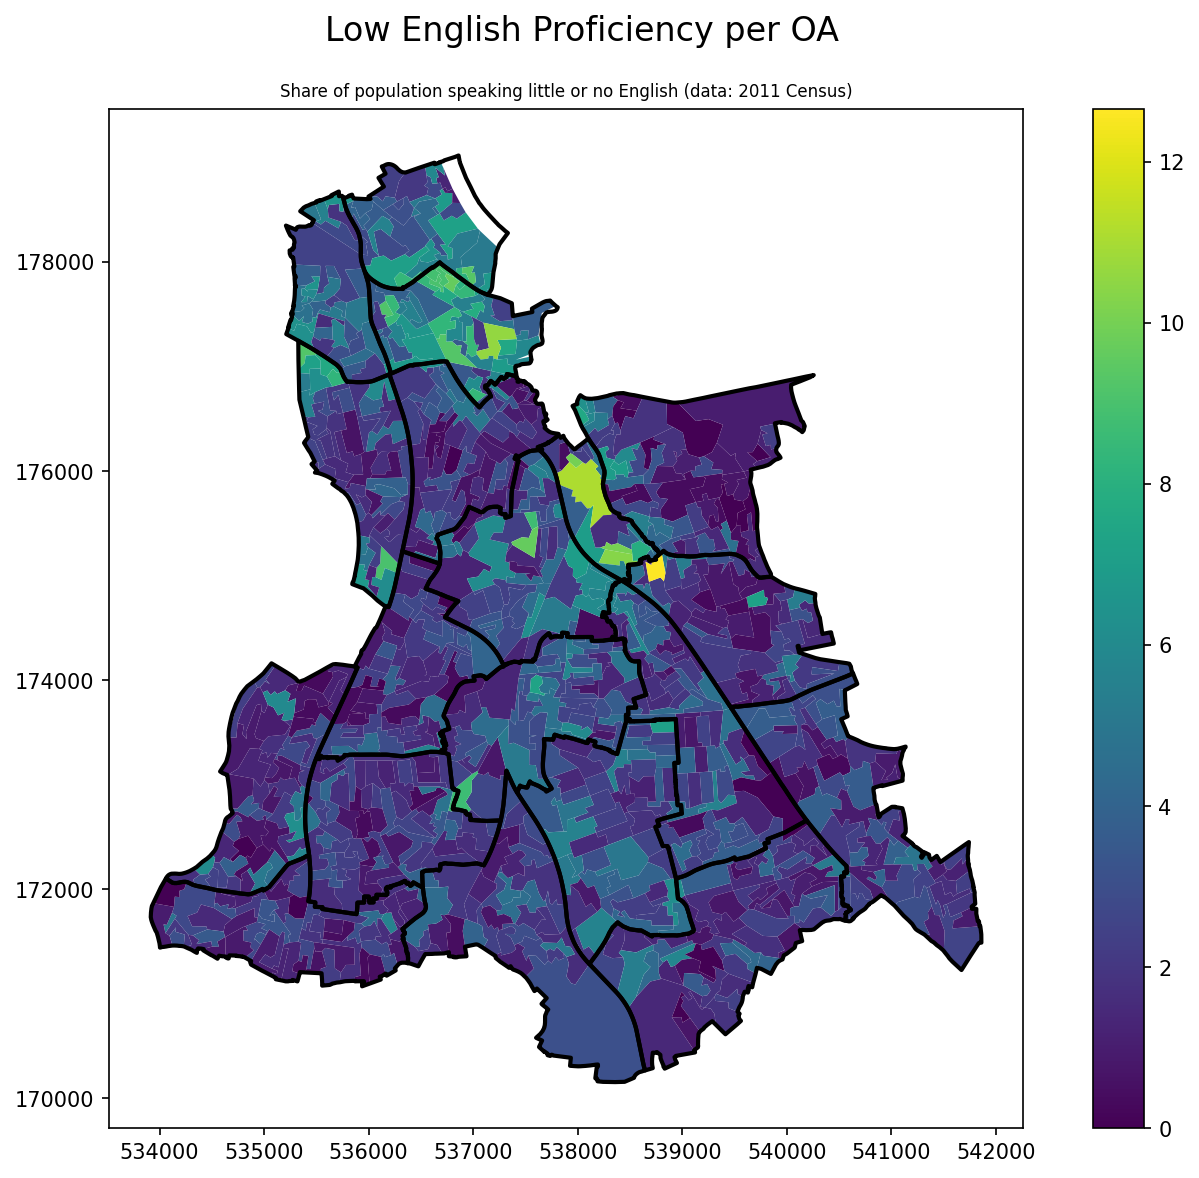

In [9]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150)
plt.suptitle('Low English Proficiency per OA', fontsize=16, y=.95)
plt.title('Share of population speaking little or no English (data: 2011 Census)', fontsize=8)
ep_oa_geom.plot(ax=ax, column='Cannot speak English well or at all', 
              legend=True) 
#oa11.plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='black')
wd22.plot(ax=ax, facecolor='none', linewidth=2, edgecolor='black')
# plt.legend()

plt.savefig(f"{out_dir}/lbl_oa11_wd22_english_proficiency_low.png", dpi=600)
plt.savefig(f"{out_dir}/lbl_oa11_wd22_english_proficiency_low.pdf")

English proficiency at Ward level
==

In [10]:
ep_wd = pd.read_csv(f"{languages_dir}/lbl_english_proficiency_share_coarse_wd22.csv")
print(len(ep_wd))
ep_wd.columns

19


Index(['WD22CD_proposed', 'English is main language',
       'Can speak English well or very well',
       'Cannot speak English well or at all'],
      dtype='object')

In [11]:
# Assign Ward names -- we can take them from the WD22 boundaries data
wd22cd_nm = wd22.set_index('WD22CD_proposed').WD22NM_proposed.to_dict()
ep_wd['WD22NM_proposed'] = ep_wd.WD22CD_proposed.map(lambda ward: wd22cd_nm[ward])

In [12]:
# Derivative to simplify the presentation.
data = ep_wd.set_index('WD22NM_proposed')[ep_wd.columns[1:-1]].copy()
data.head()

,English is main language,Can speak English well or very well,Cannot speak English well or at all
WD22NM_proposed,,,
Bellingham,87.068880,10.545671,2.385449
Blackheath,85.656320,11.882059,2.461622
Brockley,82.947594,14.983919,2.068487
Catford South,85.055386,11.789856,3.154758
Crofton Park,86.332155,11.568905,2.098940


Text(0.5, 0, '%')

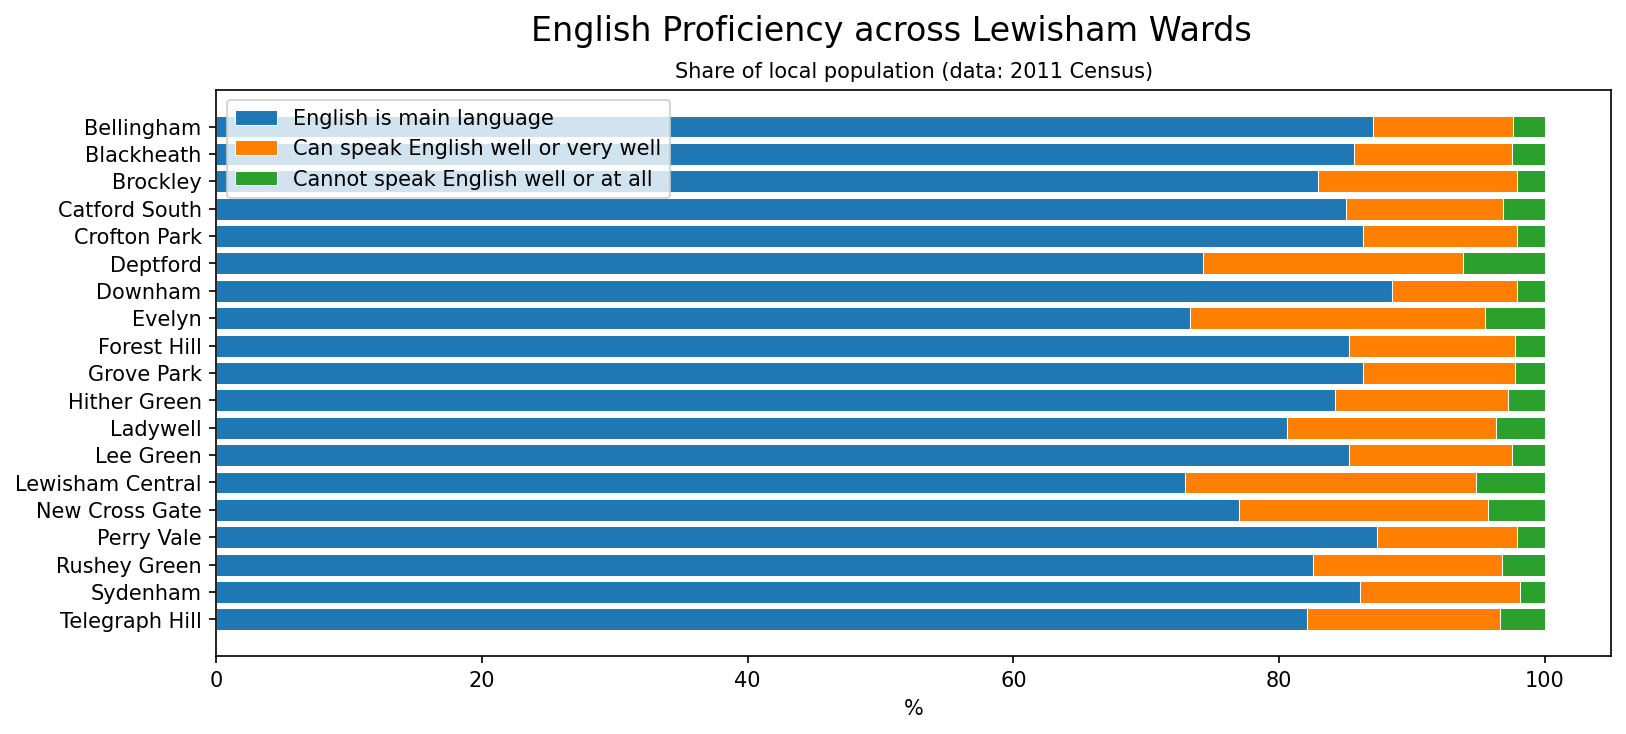

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5), dpi=150)

plt.suptitle('English Proficiency across Lewisham Wards', fontsize=16)
plt.title('Share of local population (data: 2011 Census)', fontsize=10)

ward_names = list(reversed(data.index)) 
variable_names = data.columns

base = pd.Series(index=ward_names, data=[0]*len(ward_names))

colors = [
  '#1f77b4', # blue
  '#ff7f03', # orange
  '#2ca02c', # green
  '#d62728', # red
  '#9467bd', # purple
  '#7f7f7f', # gray
]

for idx, var in enumerate(variable_names):
  values = data[var].loc[ward_names].values
  plt.barh(y=range(len(values)),
           width=values,
           height=0.8,
           left=base.values, 
           edgecolor='white', linewidth=0.5,
           color=colors[idx],
           label=var)
  base = base + values

plt.legend(loc='upper left')

plt.yticks(range(len(ward_names)), ward_names)

plt.xlabel('%')


Languages spoken
==

Full
--

In [14]:
ml_wd = pd.read_csv(f"{languages_dir}/lbl_main_language_detailed_share_wd22.csv")
print(len(ml_wd))
ml_wd.columns

19


Index(['WD22CD_proposed', 'English', 'Welsh/Cymraeg (in England only)',
       'Other UK language: Total', 'Other UK language: Gaelic (Irish)',
       'Other UK language: Gaelic (Scottish)',
       'Other UK language: Manx Gaelic',
       'Other UK language: Gaelic (Not otherwise specified)',
       'Other UK language: Cornish', 'Other UK language: Scots',
       ...
       'African Language: Afrikaans',
       'African Language: Any other Nigerian language',
       'African Language: West African language (all other)',
       'African Language: African language (all other)',
       'Other Languages: Total', 'Other Languages: All other languages',
       'Sign Language: Total', 'Sign Language: British sign language',
       'Sign Language: Sign Language (all other)',
       'Sign Language: Any Sign Communication System'],
      dtype='object', length=104)

In [15]:
# Assign Ward names -- we can take them from the WD22 boundaries data
wd22cd_nm = wd22.set_index('WD22CD_proposed').WD22NM_proposed.to_dict()
ml_wd['WD22NM_proposed'] = ml_wd.WD22CD_proposed.map(lambda ward: wd22cd_nm[ward])

Text(557.0833333333333, 0.5, '')

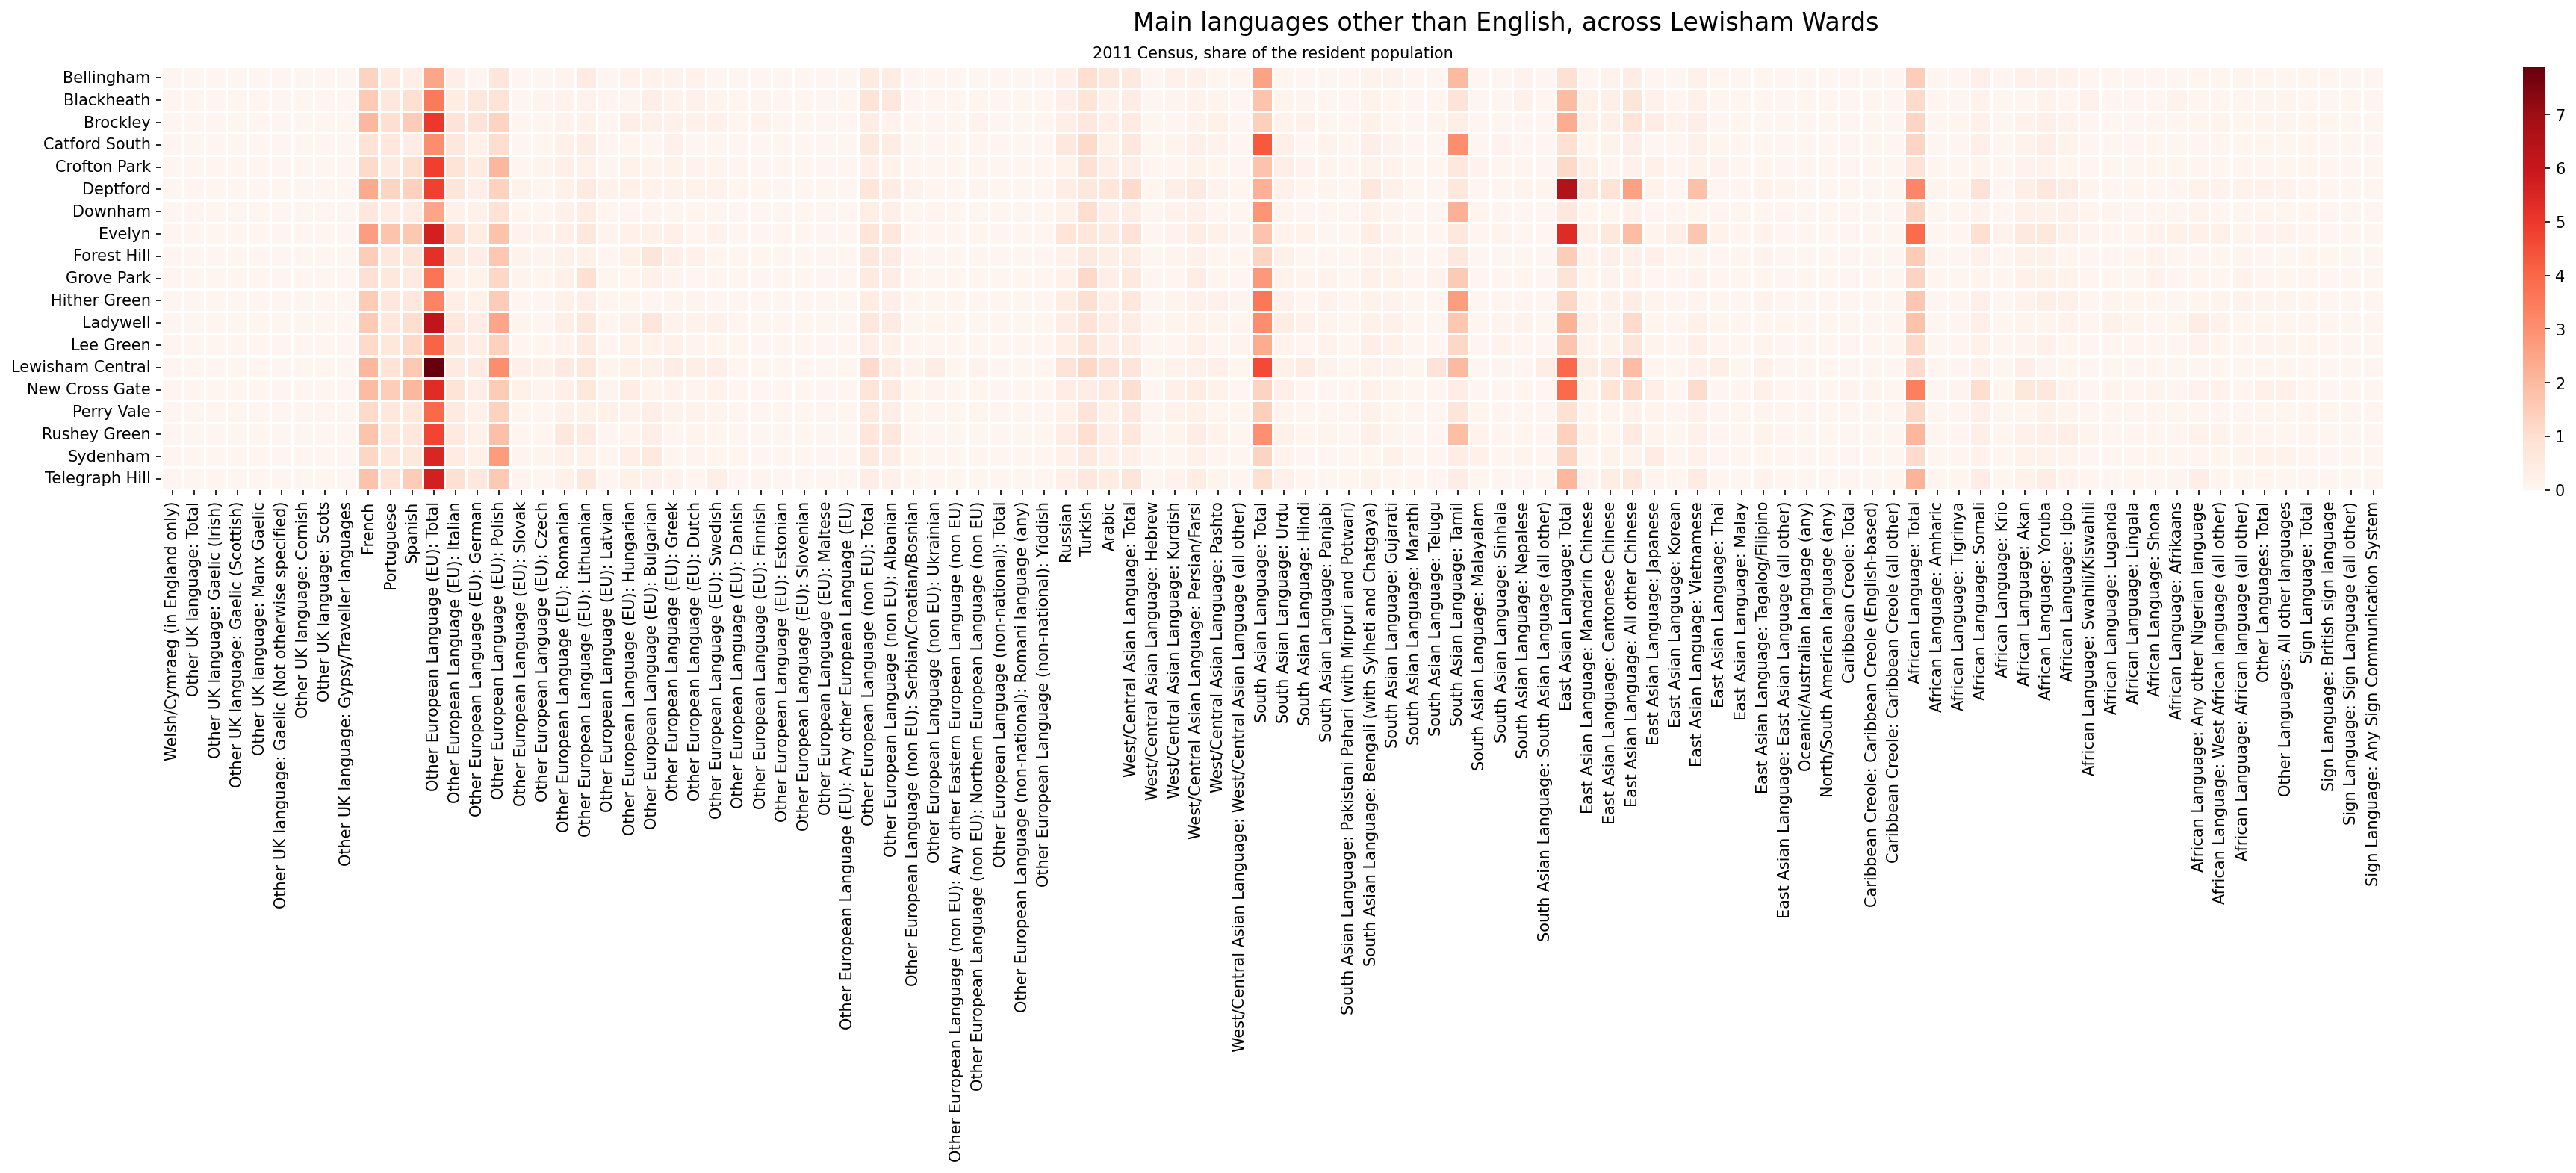

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(32, 5), dpi=150)

plt.suptitle('Main languages other than English, across Lewisham Wards', fontsize=16)
plt.title('2011 Census, share of the resident population', fontsize=10)

d = ml_wd.set_index('WD22NM_proposed')
data = d.copy()[d.columns[1:]]

ward_names = list(data.index) 
variable_names = data.columns[1:] # exclude English

sns.heatmap(data[variable_names].loc[ward_names], linewidth=1 , annot=False, cmap='Reds')
plt.xticks(rotation=90)
plt.ylabel('')

Groups
--
TODO: need to redo this, currently we're leaving out some languages. 

In [ ]:
# mlg_wd = pd.read_csv(f"{languages_dir}/lbl_main_language_groups_share_wd22.csv")
# print(len(mlg_wd))
# mlg_wd.columns

In [ ]:
# # Assign Ward names -- we can take them from the WD22 boundaries data
# wd22cd_nm = wd22.set_index('WD22CD_proposed').WD22NM_proposed.to_dict()
# mlg_wd['WD22NM_proposed'] = mlg_wd.WD22CD_proposed.map(lambda ward: wd22cd_nm[ward])

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(6, 5), dpi=150)

# plt.suptitle('Main languages other than English, across Lewisham Wards', fontsize=16)
# plt.title('2011 Census, share of the resident population', fontsize=10)

# d = mlg_wd.set_index('WD22NM_proposed')
# data = d.copy()[d.columns[1:]]

# ward_names = list(data.index) 
# variable_names = data.columns[1:] # exclude English

# sns.heatmap(data[variable_names].loc[ward_names], linewidth=1 , annot=False, cmap='Reds')
# plt.xticks(rotation=90)
# plt.ylabel('')